

### 1. Cargamos nuestro dataset y distintas librerías que van a ser útiles

Tenemos un dataset con info acerca de corazones, y si tuvieron problemas cardiacos. Nuestro objetivo es predecir esto.
  

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('heart.csv') ## link de origen csv https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


### 2. Exploramos el dataset 
    
Vemos que no tiene ninguna columna estilo ID, por lo que, por ahora, todas las coluumnas son útiles, y no debemos sacar niguna. Tiene columnas del tipo categoricas y numericas, tambien binarias.

 Tinene diversas columnas asi como el azucar en sangre, presion arterial, etc. Y esto determina diversos sintomas que podrian estar relacionados con problemas y enfermedades cardiacas.

 Encontramos varias coorelaciones, asi como:
  - Edad y Enfermedad Cardíaca: Generalmente, a mayor edad, mayor riesgo de enfermedad cardíaca.
  - Sexo y Enfermedad Cardíaca: Los hombres suelen tener un riesgo más alto, aunque no siempre es determinante.
  - Presión arterial alta (RestingBP) y Enfermedad Cardíaca: Valores elevados suelen estar relacionados.
  - Colesterol y Enfermedad Cardíaca: Niveles altos de colesterol suelen estar asociados con mayor riesgo.

In [69]:
dataset.head(10) 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### 3. Separación en train y test:

In [70]:
import sklearn.model_selection

X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=4, test_size=TEST_SIZE)

Podemos ver los tamaños de los nuevos conjuntos:

In [71]:
print(f"X_train dimensión: {X_train.shape}")
print(f"y_train dimensión: {y_train.shape}")

print(f"X_test dimensión: {X_test.shape}")
print(f"y_test dimensión: {y_test.shape}")

X_train dimensión: (734, 11)
y_train dimensión: (734,)
X_test dimensión: (184, 11)
y_test dimensión: (184,)


### 4. Construcción de los primeros modelos 

Primero vamos a dropear todas las columans categóricas y entrenar los primeros modelos.

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
arbol = DecisionTreeClassifier(criterion="entropy", random_state=42)
regression = LogisticRegression(random_state=0)

Dropear categoricas y entrenar los modelos

In [73]:
X_train_numerico = X_train
X_test_numerico = X_test

X_train_numerico = X_train_numerico.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
X_test_numerico = X_test_numerico.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

print("La tabla quedaría así:")
print("")
print(X_test_numerico.head())

arbol.fit(X_train_numerico, y_train)
regression.fit(X_train_numerico, y_train)


La tabla quedaría así:

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
476   51        132          218          1    139      0.1
244   48        160          268          0    103      1.0
701   62        128          208          1    140      0.0
634   40        140          199          0    178      1.4
687   70        156          245          0    143      0.0


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Predecimos, testeamos accuracy, y hacemos matriz de confusion

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = arbol.predict(X_test_numerico)

print(f"Accuracy del arbol sobre el test set: {accuracy_score(y_pred, y_test)}") 
print(f"Precision del arbol sobre el test set: {precision_score(y_pred, y_test)}") 
print(f"Recall del arbol sobre el test set: {recall_score(y_pred, y_test)}") 

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=["0", "1"], index=["0", "1"]))

print("")
# predecimos los valores para las instacias que no vimos de regresión
y_pred = regression.predict(X_test_numerico)

print(f"Accuracy del modelo de regresión sobre el test set: {accuracy_score(y_pred, y_test)}") 
print(f"Precision del modelo de regresión sobre el test set: {precision_score(y_pred, y_test)}") 
print(f"Recall del modelo de regresión sobre el test set: {recall_score(y_pred, y_test)}") 

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=["0", "1"], index=["0", "1"]))

Accuracy del arbol sobre el test set: 0.7119565217391305
Precision del arbol sobre el test set: 0.8020833333333334
Recall del arbol sobre el test set: 0.6936936936936937
Matriz de confusión:


,0,1
0,54,34
1,19,77



Accuracy del modelo de regresión sobre el test set: 0.7445652173913043
Precision del modelo de regresión sobre el test set: 0.78125
Recall del modelo de regresión sobre el test set: 0.7425742574257426
Matriz de confusión:


,0,1
0,62,26
1,21,75


Ambos modelos están parejos, en las estadisticas, pero vemos que sobresalen un poco en presicion. Esto significa que cuando predicen positivo, estan bastante seguros de que sea así

# Grafico
Vamos a hacer un gráfico que muestre la accuracy tanto del test como del train del arbol en funcion del max_depth

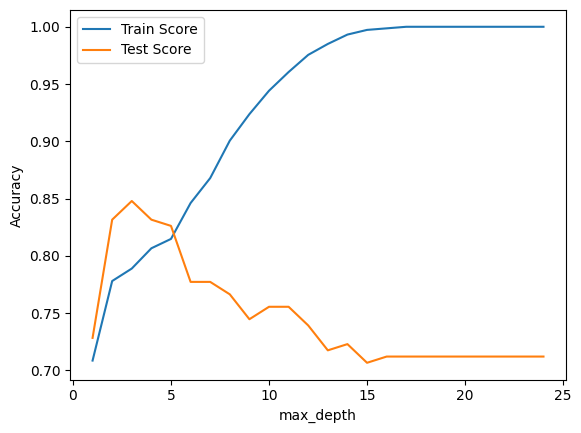

In [75]:

max_depths = range(1, 25)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy", random_state=42)
    arbol.fit(X_train_numerico, y_train)
    train_scores.append(arbol.score(X_train_numerico, y_train))
    test_scores.append(arbol.score(X_test_numerico, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Este gráfico nos muestra como la accuracy del train sigue creciendo hasta el max_depth= 20 más o menos, mientras que la del test comienza a caer muchisimo antes. Esto significa que el modelo se esta overfitiando, es decir, se está aprendiendo de memoria los resultados del train, pero luego no sabe nada para el test.

## Ahora lo vamos a hacer pero usando todos los datos (incluimos los categóricos):
Primero creamos los módelos

In [76]:
arbol = DecisionTreeClassifier(random_state=42)
regression = LogisticRegression(random_state=42)

Ahora hacemos one hot encoding para tener solucionado el tema de los cateforicos

In [77]:
X_train_con_categoricos = pd.get_dummies(X_train)
X_test_con_categorias = pd.get_dummies(X_test)

print("Ahora la tabla quedaría así:")
print("")

X_train_con_categoricos.head()

Ahora la tabla quedaría así:



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
425,60,160,267,1,157,0.5,False,True,False,True,False,False,False,False,True,True,False,False,True,False
89,55,140,229,0,110,0.5,False,True,True,False,False,False,False,True,False,False,True,False,True,False
777,55,130,262,0,155,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
239,48,160,193,0,102,3.0,False,True,True,False,False,False,False,True,False,False,True,False,True,False
889,59,134,204,0,162,0.8,False,True,False,False,False,True,False,True,False,True,False,False,False,True


# Entrenamos al de regresion normalmente, pero al arbol usando gridsearch para obtener los mejores hiperparametros.

In [78]:
regression.fit(X_train_con_categoricos, y_train)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 4, 5, 6, 7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

arbol_con_grid_search = GridSearchCV(estimator=arbol, param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

arbol_con_grid_search.fit(X_train_con_categoricos, y_train)

c:\Users\dnabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


Mostramos mejores hiperparámetros y accuracy promedio

In [79]:
print("Mejores hiperparámetros encontrados:", arbol_con_grid_search.best_params_)
print("Mejor accuracy promedio (CV):", arbol_con_grid_search.best_score_)

Mejores hiperparámetros encontrados: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Mejor accuracy promedio (CV): 0.855595937004939


# Igual que antes, predecimos, testeamos, sacamos métricas, y matriz de confusión

In [80]:
y_pred = arbol_con_grid_search.predict(X_test_con_categorias)

print(f"Accuracy del arbol sobre el test set: {accuracy_score(y_pred, y_test)}") 
print(f"Precision del arbol sobre el test set: {precision_score(y_pred, y_test)}") 
print(f"Recall del arbol sobre el test set: {recall_score(y_pred, y_test)}") 

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=["0", "1"], index=["0", "1"]))

print("")
# predecimos los valores para las instacias que no vimos de regresión
y_pred = regression.predict(X_test_con_categorias)

print(f"Accuracy del modelo de regresión sobre el test set: {accuracy_score(y_pred, y_test)}") 
print(f"Precision del modelo de regresión sobre el test set: {precision_score(y_pred, y_test)}") 
print(f"Recall del modelo de regresión sobre el test set: {recall_score(y_pred, y_test)}") 

print("Matriz de confusión:")
confusion = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
display(pd.DataFrame(confusion, columns=["0", "1"], index=["0", "1"]))

Accuracy del arbol sobre el test set: 0.8532608695652174
Precision del arbol sobre el test set: 0.8645833333333334
Recall del arbol sobre el test set: 0.8556701030927835
Matriz de confusión:


,0,1
0,74,14
1,13,83



Accuracy del modelo de regresión sobre el test set: 0.875
Precision del modelo de regresión sobre el test set: 0.9270833333333334
Recall del modelo de regresión sobre el test set: 0.8476190476190476
Matriz de confusión:


,0,1
0,72,16
1,7,89


Ahora en el arbol, luego de la busqueda de hiperparámetros y la implementacion de las datos categóricos, las predicciones positivas y negativas estan mucho más equilibradas.

En el modelo de regresión linear (que es practicamente igual, solamente se le agregan los datos categoricos al train), seguimos teniendo un desbalance entre la precision y las demás estadísticas.

# Grafico
Ahora nuevamente, vamos a hacer el mismo grafico, pero para este nuevo arbol, que incluye los datos categoricos, y tomando en cuenta los mejores hiperparametros (obviamente, sin el max_detph ideal, ya que vamos a pasar por varias para graficar).

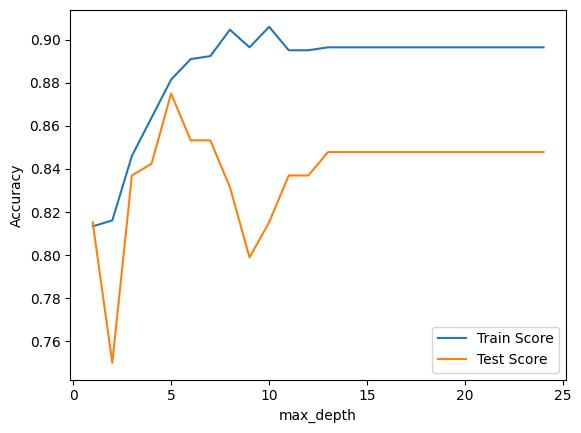

In [81]:
max_depths = range(1, 25)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="gini", max_features=None, min_samples_leaf=4, min_samples_split=10, splitter="random", random_state=42)
    arbol.fit(X_train_con_categoricos, y_train)
    train_scores.append(arbol.score(X_train_con_categoricos, y_train))
    test_scores.append(arbol.score(X_test_con_categorias, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Como era de esperarse, obtenemos resultados muy simlares a antes. Aunque el train sigue creciendo, a partir de la 5ta iteración más o menos, esmpieza a caer la accuracy del test.